## Stability in the Bansal Yaron (and BKY) Model

In [1]:
include("bansal_yaron_discretized.jl")

compute_fp_by

Default parameter values:

In [2]:
ez_by = EpsteinZinBY()
sv_by = StochasticVolatilityBY()

StochasticVolatility{Float64}(0.979, 0.044, 0.987, 7.909200000000006e-7, 2.3e-6)

In [3]:
K = compute_K_bansal_yaron(ez_by, sv_by);

In [4]:
compute_spec_rad(K)

1.055323806052942

### Spectral Radius Plot, Bansal--Yaron Parameters

In [5]:
using PyPlot
plt = PyPlot

PyPlot

In [6]:
J = 20 # grid size
R = Array{Float64}(J, J)

20×20 Array{Float64,2}:
 7.90505e-323  6.91638e-310    0.0           …  1.92567e-316  4.44672e-316
 0.0           1.86998e-316    0.0              0.0           5.29095e-316
 0.0           0.0             0.0              4.90385e252   1.0878e243  
 4.94066e-324  4.24399e-314    5.22549e-316     1.665e-321    1.69082e-317
 3.0138e-322   0.0           NaN                5.20936e-316  4.11063e-321
 4.94066e-323  0.0             8.7005e-321   …  6.91638e-310  5.53354e-322
 1.63042e-322  0.0             5.21089e-316     5.22761e-316  2.75491e-316
 0.0           2.7559e-316     5.19312e-316     5.21041e-316  0.0         
 0.0           2.21341e-321    0.0              5.24223e-316  4.44672e-316
 0.0           6.32404e-322    0.0              5.18519e-316  6.91638e-310
 0.0           5.17023e-316    2.37152e-322  …  5.25479e-316  1.92568e-316
 0.0           0.0             4.74303e-322     6.91638e-310  0.0         
 1.58101e-321  5.19789e-316    5.19788e-316     1.86998e-316  2.122e-314  
 

In [7]:
x_vals = linspace(1.25, 2.25, J)          # ψ
y_vals = linspace(0.0005, 0.01, J)        # μ

0.0005:0.0005:0.01

In [8]:
for (i, x) in enumerate(x_vals)
    for (j, y) in enumerate(y_vals)
        ez = EpsteinZinBY(ψ=x)
        @assert ez.θ < 0 "Detected non-negative theta value"
        K = compute_K_bansal_yaron(ez, sv_by, μ=y)
        R[i, j] = compute_spec_rad(K)
    end
end

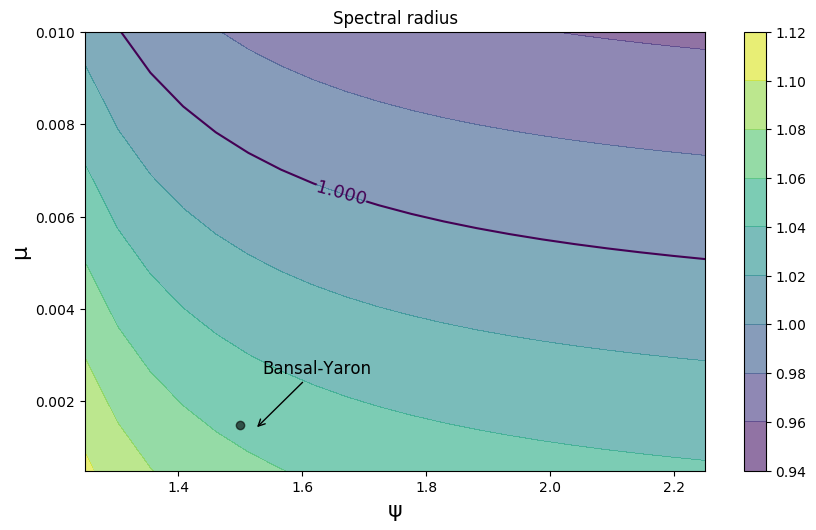

In [9]:
fig, ax = plt.subplots(figsize=(10, 5.7))

#lvs = [0.0, 0.8, 1.0, 1.4, 1.8, 2.2, 4.4]
#cls = [cm.jet(i) for i in np.linspace(0.4, 1, len(lvs))]

cs1 = ax[:contourf](x_vals, 
                    y_vals, 
                    R',
                    alpha=0.6)
                    #levels=lvs,


ctr1 = ax[:contour](x_vals, 
                    y_vals, 
                    R', 
                    levels=[1.0])

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax[:set_title]("Spectral radius")
ax[:set_xlabel]("ψ", fontsize=16)
ax[:set_ylabel]("μ", fontsize=16)


ax[:annotate]("Bansal-Yaron", 
         xy=(1.5 + 0.024, 0.0015 - 0.0001),  
         xycoords="data",
         xytext=(5, 40),
         textcoords="offset points",
         fontsize=12,
         arrowprops=Dict("arrowstyle" => "->"))

ax[:plot]([1.5], [0.0015],  "ko", alpha=0.6)

plt.savefig("by.pdf")
plt.show()

### Spectral Radius Plot with BKY Parameters

In [10]:
ez_bky = EpsteinZinBKY()
sv_bky = StochasticVolatilityBKY()

StochasticVolatility{Float64}(0.975, 0.038, 0.999, 5.1840000000000046e-8, 2.8e-6)

In [11]:
for (i, x) in enumerate(x_vals)
    for (j, y) in enumerate(y_vals)
        ez = EpsteinZinBY(ψ=x)
        @assert ez.θ < 0 "Detected non-negative theta value"
        K = compute_K_bansal_yaron(ez, sv_bky, μ=y)
        R[i, j] = compute_spec_rad(K)
    end
end

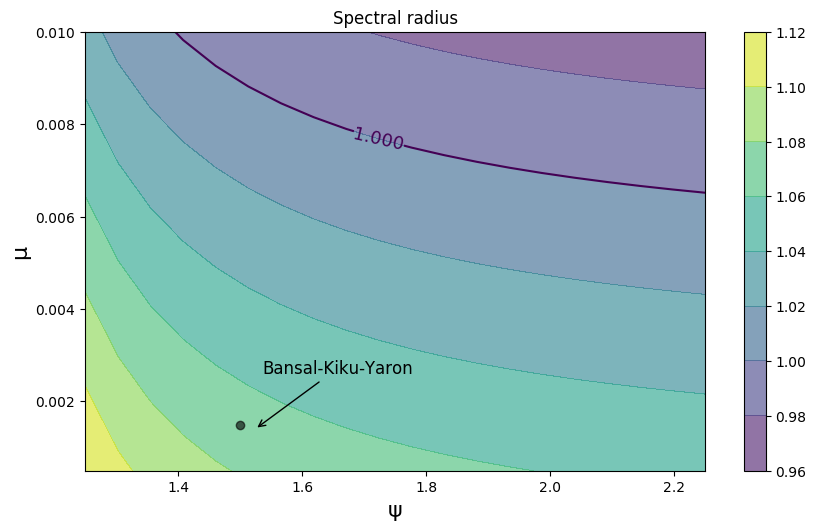

In [12]:
fig, ax = plt.subplots(figsize=(10, 5.7))

#lvs = [0.0, 0.8, 1.0, 1.4, 1.8, 2.2, 4.4]
#cls = [cm.jet(i) for i in np.linspace(0.4, 1, len(lvs))]

cs1 = ax[:contourf](x_vals, 
                    y_vals, 
                    R',
                    alpha=0.6)
                    #levels=lvs,


ctr1 = ax[:contour](x_vals, 
                    y_vals, 
                    R', 
                    levels=[1.0])

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax[:set_title]("Spectral radius")
ax[:set_xlabel]("ψ", fontsize=16)
ax[:set_ylabel]("μ", fontsize=16)


ax[:annotate]("Bansal-Kiku-Yaron", 
         xy=(1.5 + 0.024, 0.0015 - 0.0001),  
         xycoords="data",
         xytext=(5, 40),
         textcoords="offset points",
         fontsize=12,
         arrowprops=Dict("arrowstyle" => "->"))

ax[:plot]([1.5], [0.0015],  "ko", alpha=0.6)

plt.savefig("bky.pdf")
plt.show()